In [258]:
import pandas as pd
import numpy as np


num_cities = 100000

np.random.seed(107)

cities = []
for i in range(num_cities):
    city = {
        'Population': np.random.randint(1000, 1000000),
        'Latitude': np.random.uniform(0, 40),
        'Longitude': np.random.uniform(0, 60),
        'Area': np.random.randint(50, 1000),
        'GDP': np.random.uniform(0, 100),
        'High education': np.random.uniform(0, 0.4),
        'Ad budget': np.random.uniform(0, 1000000)
    }
    
    
    # city['Income'] = (
        # city['GDP'] * city['Population'] * 0.001 +
        # city['High education'] * 50000 +
        # city['Ad budget'] * 0.0001 +
        # city['Area'] * 10 +
        # (40 - city['Latitude']) * 1000 +
        # (60 - city['Longitude']) * 1000
    # )
    city['Income'] = (
        city['Population'] * city['Ad budget'] * 0.00001
    )

    cities.append(city)


df = pd.DataFrame(cities)
df.head()


,Population,Latitude,Longitude,Area,GDP,High education,Ad budget,Income
0,461862,39.642326,32.172610,381,22.526441,0.136505,152491.226921,7.042990e+05
1,948090,27.759139,21.799416,603,59.977281,0.388389,702063.933425,6.656198e+06
2,956048,28.593951,7.735642,513,20.939241,0.315871,818388.601632,7.824188e+06
3,780270,29.406730,2.384702,674,54.931801,0.032674,460493.313714,3.593091e+06
4,19953,17.394419,17.878825,647,25.797180,0.398341,384495.324809,7.671835e+04


In [259]:
df.describe()


,Population,Latitude,Longitude,Area,GDP,High education,Ad budget,Income
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,500250.253950,20.037188,30.030423,523.144450,50.122833,0.199964,500589.738239,2.505616e+06
std,289144.376184,11.523929,17.348260,273.776593,28.794586,0.115564,288248.997124,2.208221e+06
min,1015.000000,0.000411,0.001225,50.000000,0.001526,0.000006,32.999531,1.136016e+01
25%,249088.250000,10.106192,14.889579,286.000000,25.291792,0.100168,252051.524000,6.844455e+05
50%,499825.500000,20.013065,30.072954,522.000000,50.139756,0.199838,499513.729282,1.869659e+06
75%,751279.500000,30.007700,45.087395,759.000000,75.003298,0.300235,750337.736613,3.830145e+06
max,999998.000000,39.999829,59.998941,999.000000,99.999850,0.399997,999983.929245,9.969014e+06


In [260]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

X = df[['Population', 'Latitude', 'Longitude', 'Area', 'GDP', 'High education', 'Ad budget']].values
y = df['Income'].values

# scaler = StandardScaler()
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=107)

y_train_scaled = y_train / 1e6
y_test_scaled = y_test / 1e6

In [266]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop


model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),  
    Dense(16, activation='relu'),  
    Dense(1)
])


model.compile(optimizer=RMSprop(learning_rate=0.00001), loss='mean_squared_error', metrics=['mean_absolute_error'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train_scaled, epochs=70, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# history = type('', (), {'history': {}})()
# kf = KFold(n_splits=5)
# for train_index, val_index in kf.split(X_train):
#     temp_hist = model.fit(X_train[train_index], y_train[train_index], validation_data=(X_train[val_index], y_train[val_index]), epochs=20, batch_size=32, callbacks=[early_stopping])
#     # add to history
#     if 'loss' in history.history:
#         history.history['loss'].extend(temp_hist.history['loss'])
#         history.history['val_loss'].extend(temp_hist.history['val_loss'])
#     else:
#         history.history = temp_hist.history


Epoch 1/70
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 691us/step - loss: 10.7447 - val_loss: 8.7033
Epoch 2/70
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step - loss: 7.7583 - val_loss: 5.5256
Epoch 3/70
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 706us/step - loss: 4.7524 - val_loss: 3.0394
Epoch 4/70
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - loss: 2.5927 - val_loss: 1.4380
Epoch 5/70
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - loss: 1.1440 - val_loss: 0.5766
Epoch 6/70
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 693us/step - loss: 0.4885 - val_loss: 0.3304
Epoch 7/70
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - loss: 0.3065 - val_loss: 0.2430
Epoch 8/70
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 701us/step - loss: 0.2320 - val_loss: 0.1883
Epoch 9/70
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 718us/step - loss: 0.1804 - val_loss: 0.1487
Epoch 10/70
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - loss: 0.1403 - val_loss: 0.1167
Epoch 11/70
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - loss: 0.1115 - val_loss: 0.0899
Epoch 1

625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - loss: 6.4313e-05


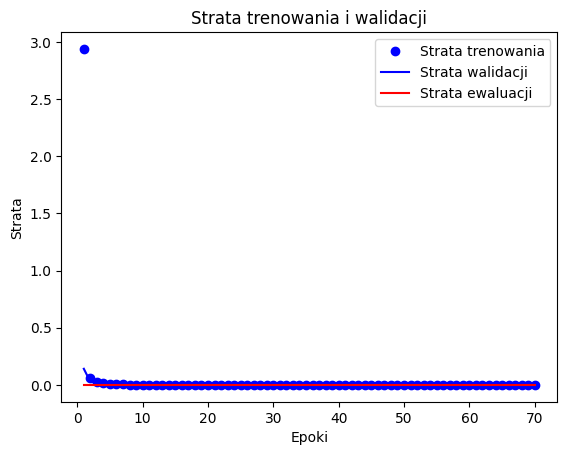

In [264]:
evaluated = model.evaluate(X_test, y_test_scaled)

history_dict = history.history


import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')

# plot evaluation
# evaluated = model.evaluate(X_test, y_test)
plt.plot(epochs, [evaluated] * len(epochs), 'r', label='Strata ewaluacji')

plt.title('Strata trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.show()


In [265]:
res = model.predict(X_test[:10]) * 1e6

diff = 0
for i in range(10):
    print(f'Predicted: {round(res[i][0])}, Real: {round(y_test[i])}, Diff: {round(abs(res[i][0]-y_test[i]))}')
    diff += abs(res[i][0]-y_test[i])
diff

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted: 2499092, Real: 2506797, Diff: 7705
Predicted: 2162349, Real: 2159840, Diff: 2509
Predicted: 5986798, Real: 5984275, Diff: 2522
Predicted: 1919068, Real: 1924560, Diff: 5491
Predicted: 2820985, Real: 2824558, Diff: 3573
Predicted: 2197480, Real: 2193654, Diff: 3826
Predicted: 8076025, Real: 8068925, Diff: 7100
Predicted: 927149, Real: 929349, Diff: 2200
Predicted: 851744, Real: 860049, Diff: 8304
Predicted: 1149039, Real: 1148092, Diff: 947


44178.25451566151